# Section 1 - $f(\mathbf{x}) = \mathbf{Ax} - \mathbf{b}$

In [74]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2,1,3],[2,6,8],[6,8,18]]).astype(np.float32) # 3 x 3
b = np.array([[1],[3],[5]]).astype(np.float32) # 3 x 1

x = np.random.uniform(-1.0,1.0,size=(3,1)) # 3 x 1

# Solution
y = np.dot(np.linalg.inv(A), b)

def F(x):
  return np.dot(A,x) - b

# definition of loss function (MSE of F(x))
def L(x):
  delta = F(x) - y
  return (np.dot(delta.T, delta) / (2 * y.shape[0])).flatten().item()

# definition of gradient
def g(x):
  return np.dot(A.T, F(x))

In [75]:
EPSILON = 1e-4
MAX_ITERATIONS = 5000

In [ ]:
def GD(x, alpha, verbose=False):
  """Implementation of gradient descent loop."""
  i = 0
  history = []
  while True:
    x = x - alpha * g(x)
    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history

In [ ]:
def Momentum(x, alpha, beta=0.9, verbose=False):
  i = 0
  history = []
  prev_vT = np.zeros_like(x)
  while True:
    vT = beta * prev_vT + (1 - beta) * g(x)
    x = x - alpha * vT
    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    prev_vT = vT

  return x, history

In [ ]:
def Adadelta(x, beta=0.95, verbose=False):
  epsilon = 1e-6
  expected_g_square = np.zeros_like(x)
  expected_delta_theta_square = np.zeros_like(x)
  rms_theta = 0
  i = 0
  history = []

  while True:
    gradient = g(x)
    expected_g_square = (beta * expected_g_square) + (1 - beta) *  np.square(gradient)

    delta_theta = -(np.sqrt(expected_delta_theta_square + epsilon) / \
                   np.sqrt(expected_g_square + epsilon)) * gradient
    x += delta_theta

    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break
    
    expected_delta_theta_square = (beta * expected_delta_theta_square) + \
        (1 - beta) * np.square(delta_theta)

  return x, history

In [ ]:
def Adam(x, alpha, beta1=0.9, beta2=0.999, verbose=False):
  epsilon = 1e-8
  m_t = np.zeros_like(x)
  v_t = np.zeros_like(x)
  i = 0
  history = []

  while True:
    gradient = g(x)
    m_t = beta1 * m_t + (1 - beta1) * gradient
    v_t = beta2 * v_t + (1 - beta2) * np.square(gradient)

    m_t_hat = m_t / (1 - beta1)
    v_t_hat = v_t / (1 - beta2)
    
    x = x - alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < EPSILON or i == MAX_ITERATIONS:
      break

  return x, history

In [87]:
def AdamWithWarmup(x, alpha, beta1, beta2, verbose=False):
  pass

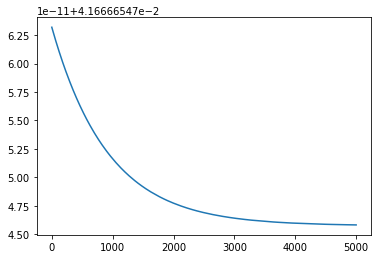

In [90]:
x, history = GD(x, alpha=0.002, verbose=False)
plt.plot(history)
plt.show()

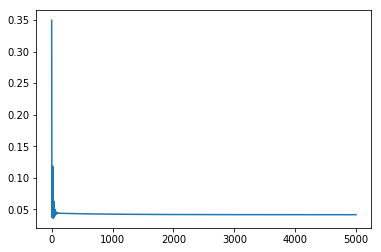

In [98]:
x, history = Momentum(x, alpha=0.002, beta=0.9, verbose=False)
plt.plot(history)
plt.show()

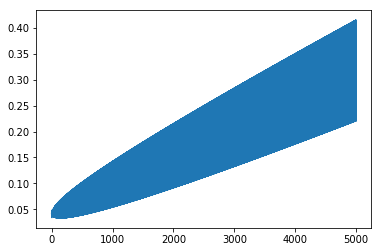

In [99]:
x, history = Adadelta(x, verbose=False)
plt.plot(history)
plt.show()

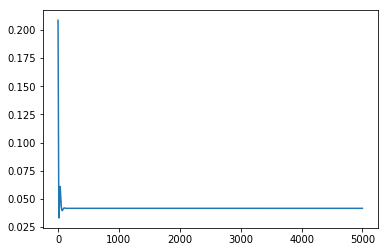

In [100]:
x, history = Adam(x, alpha=0.001, verbose=False)
plt.plot(history)
plt.show()

In [ ]:
x, history = AdamWithWarmup(x, alpha=0.001, verbose=False)
plt.plot(history)
plt.show()

# Section 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-1.0,1.0,size=(2,1))

def F(x):
  return np.power(1-x[0],2) + 100.0*np.power(x[1] - np.power(x[0],2),2)


# definition of loss function (MSE of F(x))
def L(x):
  return F(x)


# definition of gradient
def g(x):
  return np.array([
    -(1-x[0]) - 100.0*4*x[0]*(x[1] - np.power(x[0],2)), # "-(1-x[0])" should be "-2(1-x[0])"?
    100.0*2*(x[1] - np.power(x[0],2))
  ])


def GD(x, alpha, verbose=False):
  """Implementation of gradient descent loop."""
  i = 0
  history = []
  while True:
    x = x - alpha * g(x)
    loss = L(x)
    history.append(loss)
    if verbose:
      print(i, loss, x.flatten())
    i += 1
    if loss < 1e-7 or i == 50000:
      break

  return x, history

# plot loss over time until it converges

def Momentum(x, alpha, beta, verbose=False):
  pass

def Adadelta(x, beta, verbose=False):
  pass

def Adam(x, alpha, beta1, beta2, verbose=False):
  pass

def AdamWithWarmup(x, alpha, beta1, beta2, verbose=False):
  pass

x, history = GD(x, 0.002, True)
plt.plot(history)
plt.show()


# Section 3

In [ ]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype(np.float32)
x_test = x_test.reshape(x_test.shape[0], 784).astype(np.float32)

y_train = to_categorical(y_train, 10).astype(np.float32)
y_test = to_categorical(y_test, 10).astype(np.float32)

print(x_train.shape, y_train.shape)

# create a network using the network you created before (with sigmoid as output layer)
# and train your network here using SGD, Momentum, Adadelta, Adam and
# AdamWithWarmup
# 
# Plot accuracy and loss as a function of the number of iterations for each
# optimization function above.


In [12]:
np.diag(A)

array([ 2.,  6., 18.], dtype=float32)